In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open("../loging.log", "r") as f:
    file = [s.strip().split("#") for s in f.readlines()]

In [4]:
df = pd.DataFrame(file)
header = df.iloc[0]

df = df[1:]
df.columns = header
type_map = {"method": "str"}
for h in header[2:]:
    type_map[h] = "int32"

In [5]:
df.head()

,datastructure,method,strategy,k,n_neighbors,n_batch,n_line_train0,n_line_train1,n_line_train2,n_line_train3,...,query_time7,combine_time0,combine_time1,combine_time2,combine_time3,combine_time4,combine_time5,combine_time6,combine_time7,total
1,[RustVector],"""deepcopy""",1,15000,30,2,12500,12500,12500,12500,...,624946,107,103,97,90,104,95,99,105,666712
2,[RustVector],"""deepcopy""",1,15000,30,2,12500,12500,12500,12500,...,634460,106,93,101,93,89,81,117,88,667951
3,[RustVector],"""deepcopy""",1,15000,30,2,12500,12500,12500,12500,...,628429,103,91,113,85,104,75,122,104,661774
4,[RustVector],"""deepcopy""",1,15000,30,2,12500,12500,12500,12500,...,628508,105,82,92,145,89,92,85,125,662102
5,[RustVector],"""deepcopy""",1,15000,30,2,12500,12500,12500,12500,...,633944,108,95,101,136,109,85,85,131,666087


In [6]:
df = df.astype(type_map)

In [7]:
load_cols = ["load_time" + str(i) for i in range(8)]
preprocess_cols = ["preprocess_time" + str(i) for i in range(8)]
query_cols = ["query_time" + str(i) for i in range(8)]
combine_cols = ["combine_time" + str(i) for i in range(8)]
total_col = ["total"]

agg_v = df.groupby(["method", "strategy","n_batch", "k", "n_neighbors"])[load_cols + preprocess_cols + query_cols + combine_cols + total_col]

In [8]:
df[(df["method"] == '"arc"')][["method", "strategy","n_batch", "k"] + query_cols]

,method,strategy,n_batch,k,query_time0,query_time1,query_time2,query_time3,query_time4,query_time5,query_time6,query_time7
53,"""arc""",1,2,15000,693648,699394,707138,705107,705012,705484,705491,706795
54,"""arc""",1,2,15000,670730,674503,680976,680911,681017,680296,680899,680149
55,"""arc""",1,2,15000,629565,635246,641302,640623,640759,641788,639698,641115
56,"""arc""",1,2,15000,660259,664052,669061,667996,669535,666781,668728,668512
57,"""arc""",1,2,15000,701148,706800,712548,712428,711483,711290,711603,709011
58,"""arc""",1,3,15000,593578,602346,613240,612016,609103,611639,613153,610450
59,"""arc""",1,3,15000,605193,610181,622975,620523,618293,621289,621967,621556
60,"""arc""",1,3,15000,607045,611201,621516,613899,618257,620313,621142,619940
61,"""arc""",1,3,15000,599183,603695,613282,613290,612033,613375,613289,612004
62,"""arc""",1,3,15000,602288,608013,618560,617666,615254,618602,618190,618762


In [9]:
agg_mean = agg_v.mean()

In [10]:
agg_mean

0                                              load_time0  load_time1  \
method     strategy n_batch k     n_neighbors                           
"arc"      1        2       15000 30               1091.6       815.4   
                    3       15000 30               1300.0       979.6   
                            20000 30                905.6       717.8   
                            25000 30                853.4       693.4   
           2        2       15000 30               1498.2      1141.0   
                            20000 30               1494.2      1139.2   
                            25000 30               1252.0       959.8   
                    3       15000 30               1070.4       854.4   
                            20000 30               1055.6       848.2   
                            25000 30               1117.4       862.6   
"deepcopy" 1        2       15000 30               1258.4      1011.6   
                            20000 30               2531.6      2271.8   
                    3       15000 30                958.2       792.8   
                            20000 30                915.6       751.2   
                            25000 30                868.6       710.8   
           2        2       15000 30               1621.2      1283.6   
                            20000 30               1075.0       852.0   
                            25000 30               1361.5      1065.5   
                    3       15000 30               1061.2       901.2   
                            20000 30               1074.8       923.4   
                            25000 30               1021.6       869.6   

0                                              load_time2  load_time3  \
method     strategy n_batch k     n_neighbors                           
"arc"      1        2       15000 30                440.8       446.0   
                    3       15000 30                478.2       499.4   
                            20000 30                332.2       364.0   
                            25000 30                318.4       340.0   
           2        2       15000 30                590.8       617.2   
                            20000 30                602.4       651.2   
                            25000 30                536.8       548.0   
                    3       15000 30                413.6       440.8   
                            20000 30                414.0       444.0   
                            25000 30                425.2       460.2   
"deepcopy" 1        2       15000 30                583.8       586.8   
                            20000 30               1847.4      2039.2   
                    3       15000 30                438.4       477.0   
                            20000 30                365.0       387.8   
                            25000 30                369.8       370.0   
           2        2       15000 30                678.8       707.4   
                            20000 30                452.4       470.8   
                            25000 30                519.5       545.0   
                    3       15000 30                411.8       442.0   
                            20000 30                426.2       471.6   
                            25000 30                387.2       429.2   

0                                              load_time4  load_time5  \
method     strategy n_batch k     n_neighbors                           
"arc"      1        2       15000 30                444.8       477.6   
                    3       15000 30                447.4       559.8   
                            20000 30                333.4       382.8   
                            25000 30                315.2       359.8   
           2        2       15000 30                577.8       668.6   
                            20000 30                589.4       693.6   
                            25000 30                557.

In [11]:
agg_reidx = agg_mean.reset_index(level=['method', "strategy", 'n_batch', 'k'])

In [12]:
agg_v = df.groupby(["method", "strategy", "n_batch", "k"])[load_cols + preprocess_cols + query_cols + combine_cols + total_col]
agg_mean = agg_mean.reset_index(["method", "strategy","n_batch", "k"])

In [13]:
agg_mean

,method,strategy,n_batch,k,load_time0,load_time1,load_time2,load_time3,load_time4,load_time5,...,query_time7,combine_time0,combine_time1,combine_time2,combine_time3,combine_time4,combine_time5,combine_time6,combine_time7,total
n_neighbors,,,,,,,,,,,,,,,,,,,,,
30,"""arc""",1,2,15000,1091.6,815.4,440.8,446.0,444.8,477.6,...,681116.4,215.8,270.2,340.4,60.0,393.8,282.2,309.8,343.0,726496.0
30,"""arc""",1,3,15000,1300.0,979.6,478.2,499.4,447.4,559.8,...,616542.4,82.0,217.8,83.8,79.4,189.2,73.0,86.6,80.2,657066.0
30,"""arc""",1,3,20000,905.6,717.8,332.2,364.0,333.4,382.8,...,854365.8,84.0,171.6,393.0,161.2,244.8,81.8,95.6,95.2,899464.4
30,"""arc""",1,3,25000,853.4,693.4,318.4,340.0,315.2,359.8,...,1093035.0,82.4,645.4,609.8,272.0,699.8,112.8,101.0,82.4,1139588.4
30,"""arc""",2,2,15000,1498.2,1141.0,590.8,617.2,577.8,668.6,...,650467.6,57.2,53.0,61.6,65.6,67.8,50.8,61.8,63.2,709318.2
30,"""arc""",2,2,20000,1494.2,1139.2,602.4,651.2,589.4,693.6,...,1117623.4,66.0,60.6,69.6,63.4,79.4,60.0,81.0,58.2,1189922.6
30,"""arc""",2,2,25000,1252.0,959.8,536.8,548.0,557.4,586.6,...,1421868.6,71.0,59.0,72.0,66.4,75.6,59.0,69.4,63.2,1502585.8
30,"""arc""",2,3,15000,1070.4,854.4,413.6,440.8,405.0,465.8,...,917079.6,117.6,107.2,112.2,107.0,120.4,114.0,116.8,111.2,1003873.0
30,"""arc""",2,3,20000,1055.6,848.2,414.0,444.0,416.8,463.6,...,1218124.2,112.2,94.8,107.8,106.6,114.8,92.4,113.4,96.2,1314357.2


In [14]:
agg_mean['load_total'] = agg_mean[load_cols].apply(np.sum, axis = 1)
agg_mean['preprocess_total'] = agg_mean[preprocess_cols].apply(np.sum, axis = 1)
agg_mean['query_total'] = agg_mean[query_cols].apply(np.sum, axis = 1)
agg_mean['combine_total'] = agg_mean[combine_cols].apply(np.sum, axis = 1)

In [15]:
agg_total = agg_mean[["method", "strategy", "n_batch", "k", 'load_total', 'preprocess_total', 'query_total', 'combine_total', 'total']]

In [16]:
agg_total

,method,strategy,n_batch,k,load_total,preprocess_total,query_total,combine_total,total
n_neighbors,,,,,,,,,
30,"""arc""",1,2,15000,4686.2,328301.0,5435776.2,2215.2,726496.0
30,"""arc""",1,3,15000,5318.4,278149.6,4907660.2,892.0,657066.0
30,"""arc""",1,3,20000,3797.2,345990.2,6788819.2,1327.2,899464.4
30,"""arc""",1,3,25000,3599.4,415313.8,8661236.2,2605.6,1139588.4
30,"""arc""",2,2,15000,6388.8,438231.6,5191405.2,481.0,709318.2
30,"""arc""",2,2,20000,6475.2,560375.4,8879318.0,538.2,1189922.6
30,"""arc""",2,2,25000,5579.2,602796.8,11343429.8,535.6,1502585.8
30,"""arc""",2,3,15000,4591.4,629437.2,7301334.6,906.4,1003873.0
30,"""arc""",2,3,20000,4574.8,719946.0,9712161.4,838.2,1314357.2


In [17]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

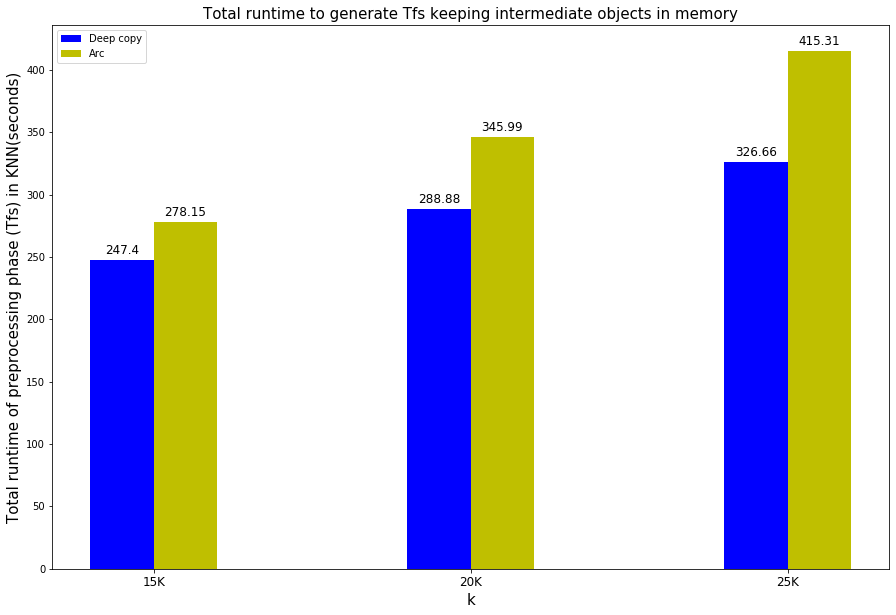

In [18]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["preprocess_total"] / 1000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["preprocess_total"] / 1000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("k", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to generate Tfs keeping intermediate objects in memory", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

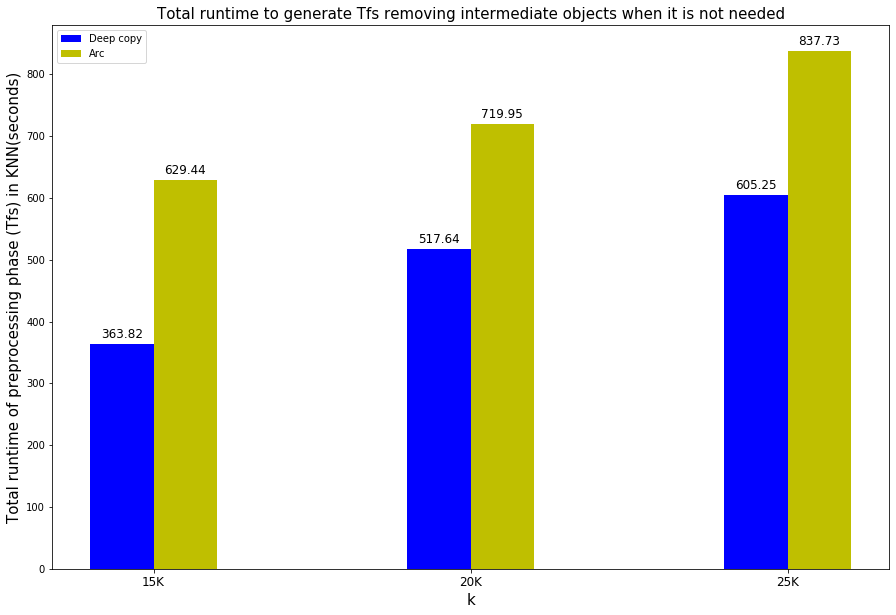

In [19]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["preprocess_total"] / 1000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["preprocess_total"] / 1000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("k", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to generate Tfs removing intermediate objects when it is not needed", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

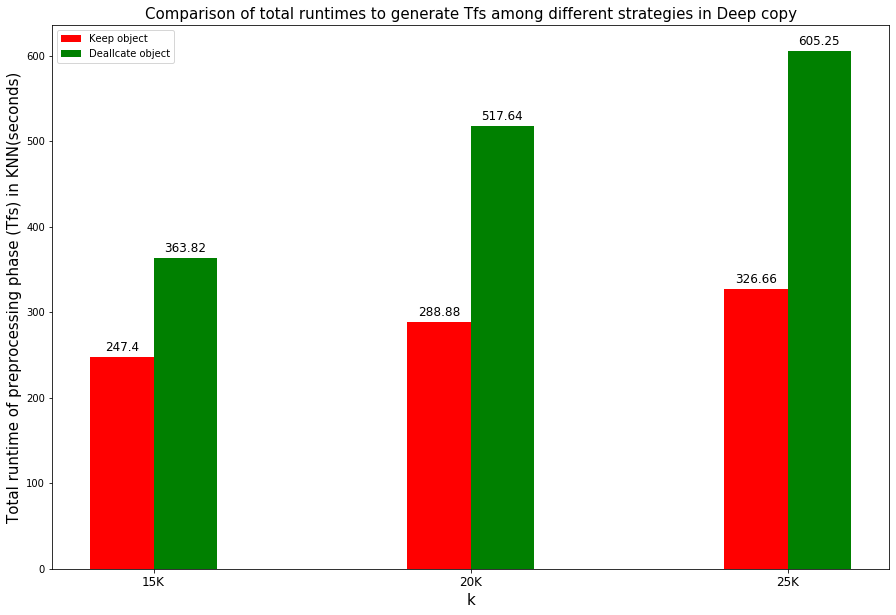

In [20]:
strategy1 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
strategy2 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(strategy1["preprocess_total"] / 1000, 2), width = w, color ='r', align = 'center')
b2 = ax.bar(idx + w / 2, round(strategy2["preprocess_total"] / 1000, 2), width = w, color ='g', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("k", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Comparison of total runtimes to generate Tfs among different strategies in Deep copy", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Keep object", "Deallcate object"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

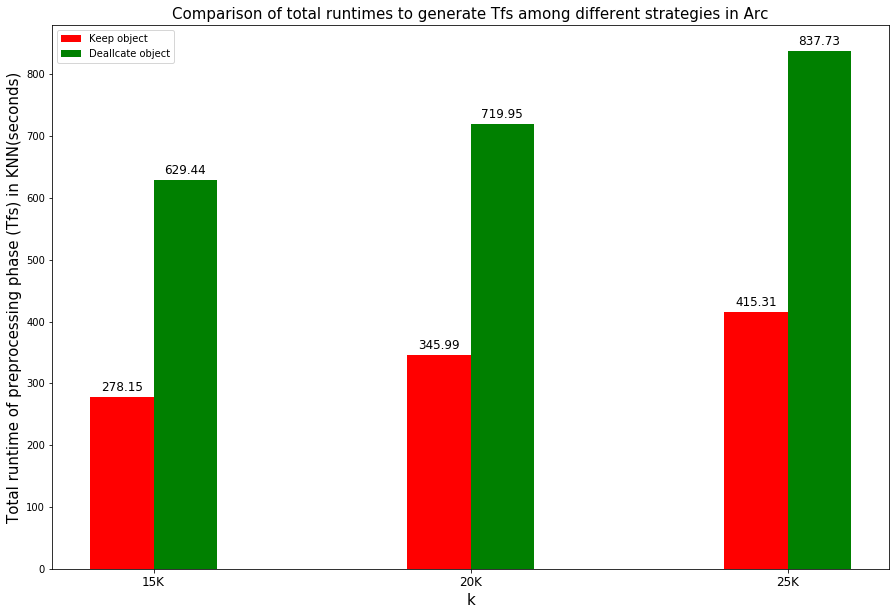

In [21]:
strategy1 = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
strategy2 = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(strategy1["preprocess_total"] / 1000, 2), width = w, color ='r', align = 'center')
b2 = ax.bar(idx + w / 2, round(strategy2["preprocess_total"] / 1000, 2), width = w, color ='g', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("k", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Comparison of total runtimes to generate Tfs among different strategies in Arc", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Keep object", "Deallcate object"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

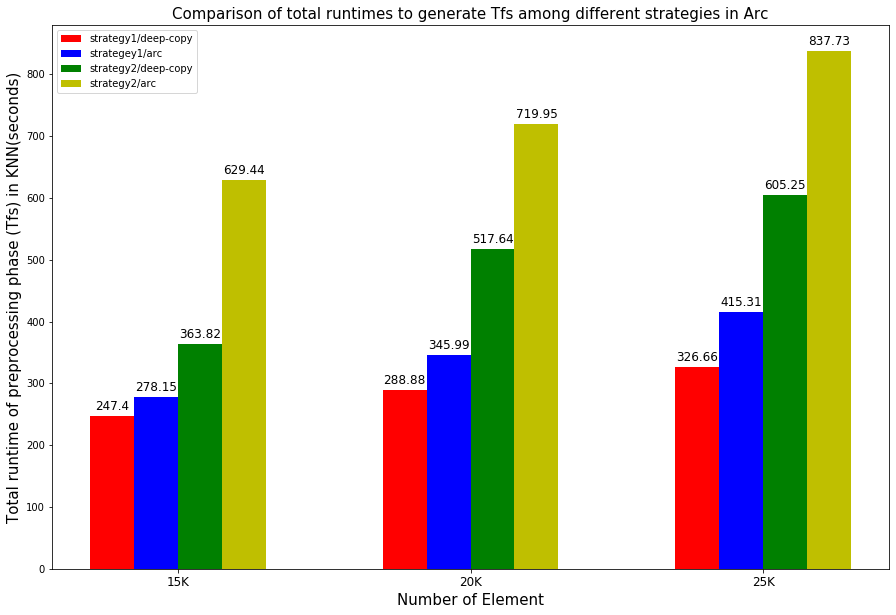

In [22]:
deepcopy_strategy1 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
deepcopy_strategy2 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
arc_strategy1 = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
arc_strategy2 = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.15
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - 3 * w / 2 , round(deepcopy_strategy1["preprocess_total"] / 1000, 2), width = w, color ='r', align = 'center')
b2 = ax.bar(idx - w / 2, round(arc_strategy1["preprocess_total"] / 1000, 2), width = w, color ='b', align = 'center')
b3 = ax.bar(idx + w / 2 , round(deepcopy_strategy2["preprocess_total"] / 1000, 2), width = w, color ='g', align = 'center')
b4 = ax.bar(idx + 3 * w / 2, round(arc_strategy2["preprocess_total"] / 1000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Comparison of total runtimes to generate Tfs among different strategies in Arc", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
autolabel(b3, ax)
autolabel(b4, ax)
ax.legend((b1, b2, b3, b4), ("strategy1/deep-copy", "strategey1/arc", "strategy2/deep-copy", "strategy2/arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

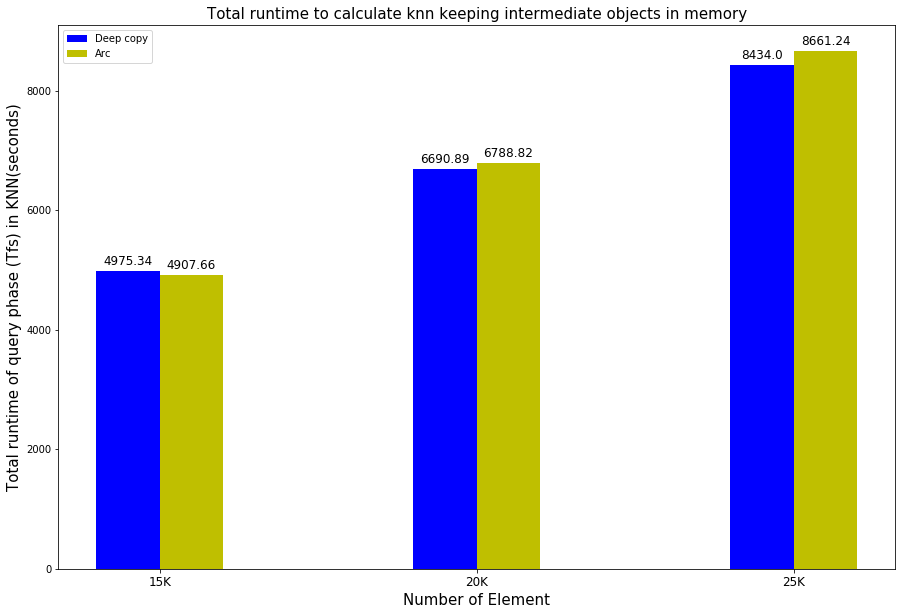

In [23]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["query_total"] / 1000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["query_total"] / 1000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of query phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to calculate knn keeping intermediate objects in memory", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

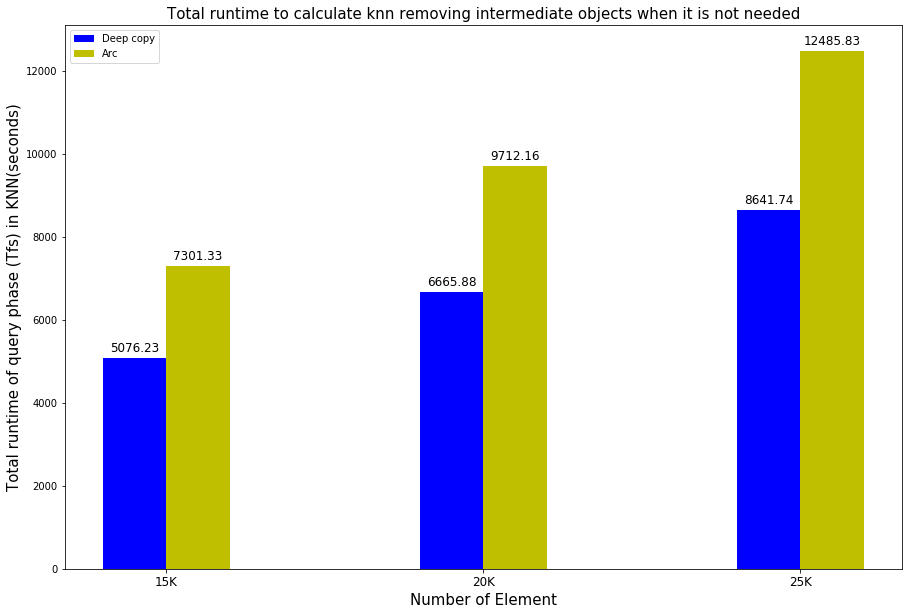

In [24]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["query_total"] / 1000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["query_total"] / 1000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of query phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to calculate knn removing intermediate objects when it is not needed", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

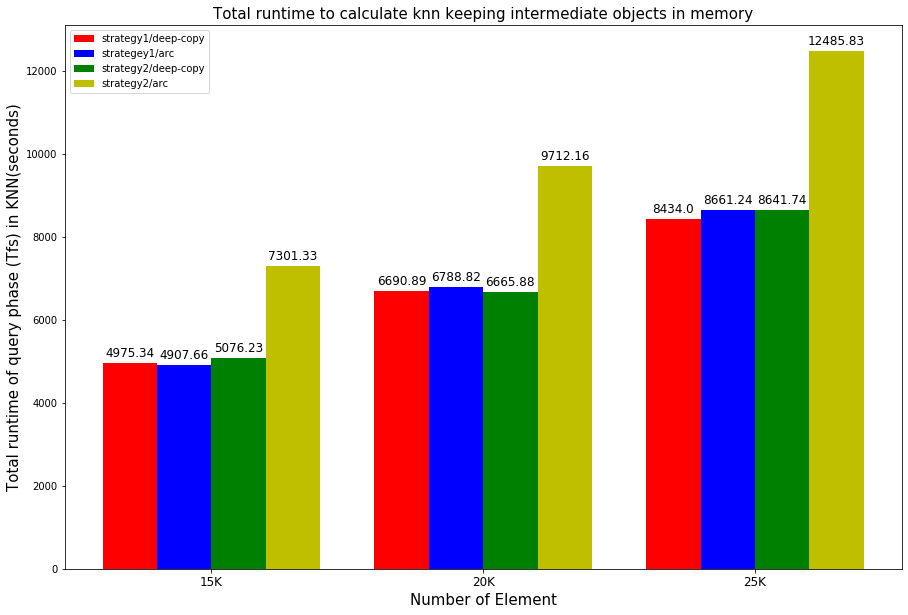

In [25]:
deepcopy_strategy1 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
deepcopy_strategy2 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
arc_strategy1 = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
arc_strategy2 = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - 3 * w / 2 , round(deepcopy_strategy1["query_total"] / 1000, 2), width = w, color ='r', align = 'center')
b2 = ax.bar(idx - w / 2, round(arc_strategy1["query_total"] / 1000, 2), width = w, color ='b', align = 'center')
b3 = ax.bar(idx + w / 2 , round(deepcopy_strategy2["query_total"] / 1000, 2), width = w, color ='g', align = 'center')
b4 = ax.bar(idx + 3 * w / 2, round(arc_strategy2["query_total"] / 1000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of query phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to calculate knn keeping intermediate objects in memory", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
autolabel(b3, ax)
autolabel(b4, ax)
ax.legend((b1, b2, b3, b4), ("strategy1/deep-copy", "strategey1/arc", "strategy2/deep-copy", "strategy2/arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

In [26]:
def autolabel_zigzag(rects, ax, sign):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3) + sign * round(height, 3) * 0.1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

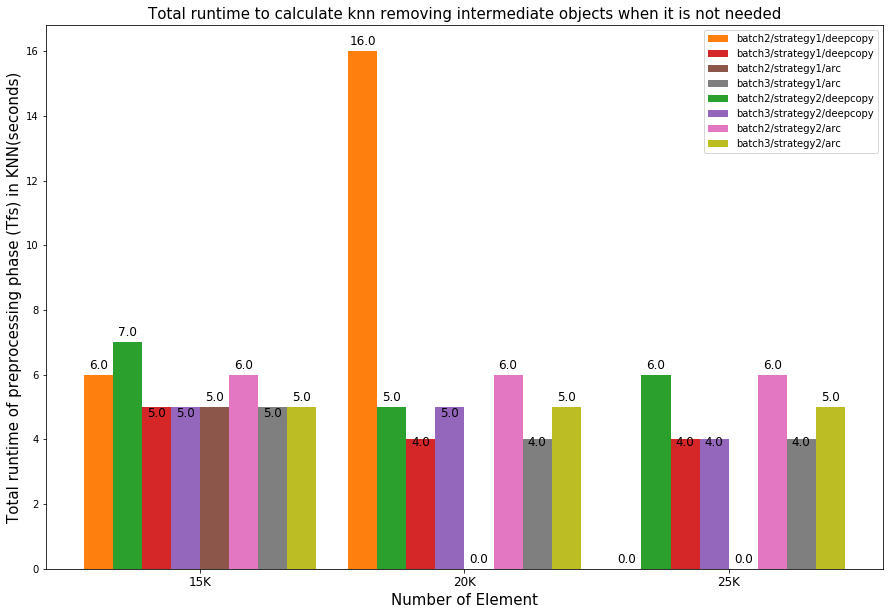

In [27]:
batch2_strategy1_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 2)]
batch2_strategy2_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3_strategy1_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
batch3_strategy2_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
batch2_strategy1_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 2)]
batch2_strategy2_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3_strategy1_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
batch3_strategy2_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.11
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - 7 * w / 2, np.round(np.append(batch2_strategy1_deepcopy["load_total"].values, 0.0) / 1000, 0), width = w, color ='C1', align = 'center')
b2 = ax.bar(idx - 3 * w / 2 , np.round(batch3_strategy1_deepcopy["load_total"] / 1000, 0), width = w, color ='C3', align = 'center')
b3 = ax.bar(idx + w / 2, np.round(np.append(batch2_strategy1_arc["load_total"].values, [0.0, 0.0]) / 1000, 0), width = w, color ='C5', align = 'center')
b4 = ax.bar(idx + 5 * w / 2, np.round(batch3_strategy1_arc["load_total"] / 1000, 0), width = w, color ='C7', align = 'center')
b5 = ax.bar(idx - 5 * w / 2, np.round(batch2_strategy2_deepcopy["load_total"] / 1000, 0), width = w, color ='C2', align = 'center')
b6 = ax.bar(idx - w / 2, np.round(batch3_strategy2_deepcopy["load_total"] / 1000, 0), width = w, color ='C4', align = 'center')
b7 = ax.bar(idx + 3 * w / 2, np.round(batch2_strategy2_arc["load_total"] / 1000, 0), width = w, color ='C6', align = 'center')
b8 = ax.bar(idx + 7 * w / 2, np.round(batch3_strategy2_arc["load_total"] / 1000, 0), width = w, color ='C8', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to calculate knn removing intermediate objects when it is not needed", fontsize = 15)
autolabel_zigzag(b1, ax, 0)
autolabel_zigzag(b2, ax, -1)
autolabel_zigzag(b3, ax, 0)
autolabel_zigzag(b4, ax, -1)
autolabel_zigzag(b5, ax, 0)
autolabel_zigzag(b6, ax, -1)
autolabel_zigzag(b7, ax, 0)
autolabel_zigzag(b8, ax, -0)
ax.legend((b1, b2, b3, b4, b5, b6, b7, b8), 
          ("batch2/strategy1/deepcopy", "batch3/strategy1/deepcopy", 
           "batch2/strategy1/arc", "batch3/strategy1/arc", 
           "batch2/strategy2/deepcopy", "batch3/strategy2/deepcopy",  
           "batch2/strategy2/arc","batch3/strategy2/arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


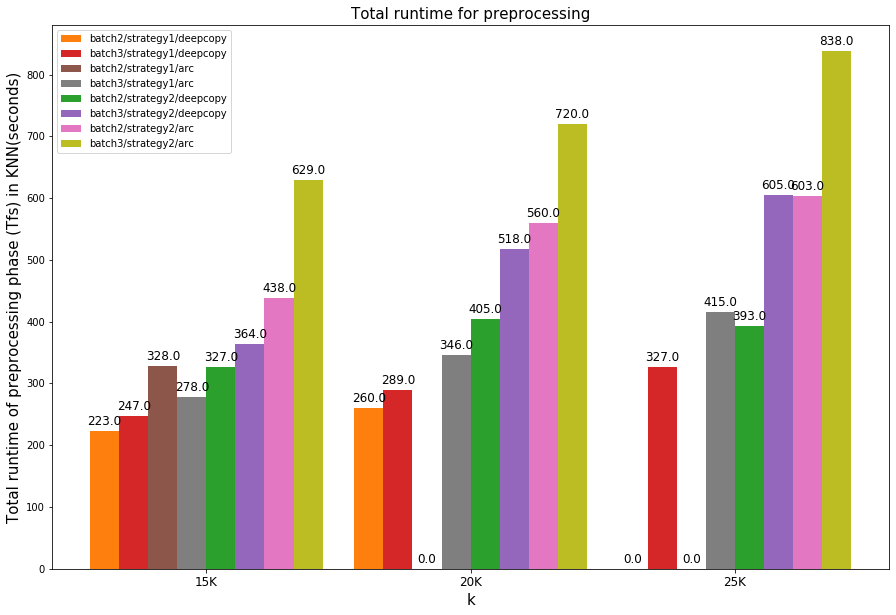

In [55]:
batch2_strategy1_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 2)]
batch2_strategy2_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3_strategy1_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
batch3_strategy2_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
batch2_strategy1_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 2)]
batch2_strategy2_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3_strategy1_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
batch3_strategy2_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.11
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - 7 * w / 2, np.round(np.append(batch2_strategy1_deepcopy["preprocess_total"].values, 0.0) / 1000, 0), width = w, color ='C1', align = 'center')
b2 = ax.bar(idx - 5 * w / 2 , np.round(batch3_strategy1_deepcopy["preprocess_total"] / 1000, 0), width = w, color ='C3', align = 'center')
b3 = ax.bar(idx - 3* w / 2, np.round(np.append(batch2_strategy1_arc["preprocess_total"].values, [0.0, 0.0]) / 1000, 0), width = w, color ='C5', align = 'center')
b4 = ax.bar(idx - w / 2, np.round(batch3_strategy1_arc["preprocess_total"] / 1000, 0), width = w, color ='C7', align = 'center')
b5 = ax.bar(idx + w / 2, np.round(batch2_strategy2_deepcopy["preprocess_total"] / 1000, 0), width = w, color ='C2', align = 'center')
b6 = ax.bar(idx + 3 * w / 2, np.round(batch3_strategy2_deepcopy["preprocess_total"] / 1000, 0), width = w, color ='C4', align = 'center')
b7 = ax.bar(idx + 5 * w / 2, np.round(batch2_strategy2_arc["preprocess_total"] / 1000, 0), width = w, color ='C6', align = 'center')
b8 = ax.bar(idx + 7 * w / 2, np.round(batch3_strategy2_arc["preprocess_total"] / 1000, 0), width = w, color ='C8', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("k", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime for preprocessing", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
autolabel(b3, ax)
autolabel(b4, ax)
autolabel(b5, ax)
autolabel(b6, ax)
autolabel(b7, ax)
autolabel(b8, ax)
ax.legend((b1, b2, b3, b4, b5, b6, b7, b8), 
          ("batch2/strategy1/deepcopy", "batch3/strategy1/deepcopy", 
           "batch2/strategy1/arc", "batch3/strategy1/arc", 
           "batch2/strategy2/deepcopy", "batch3/strategy2/deepcopy",  
           "batch2/strategy2/arc","batch3/strategy2/arc"))
##ax.set_yscale('log')
fig.savefig("preprocessing.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


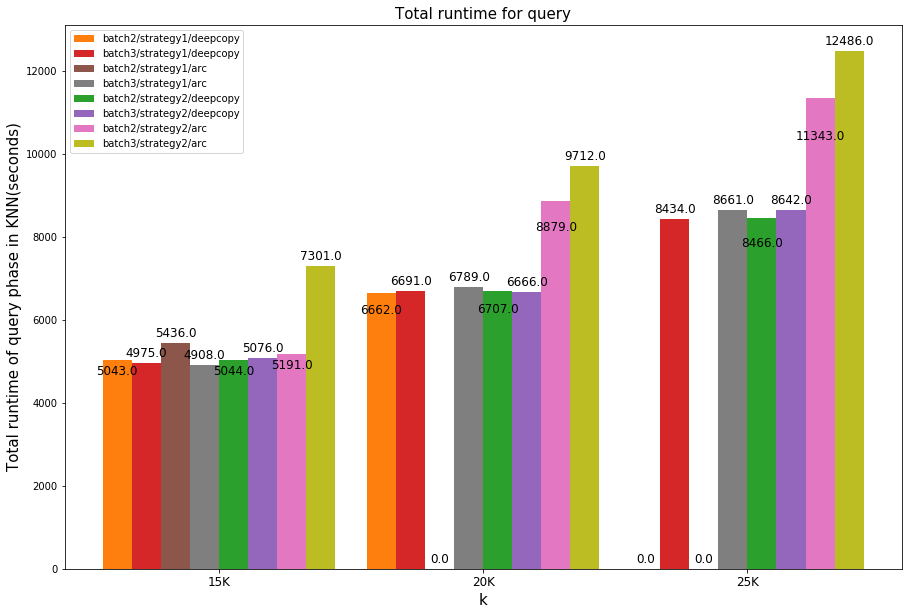

In [58]:
batch2_strategy1_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 2)]
batch2_strategy2_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3_strategy1_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
batch3_strategy2_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
batch2_strategy1_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 2)]
batch2_strategy2_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3_strategy1_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
batch3_strategy2_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.11
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - 7 * w / 2, np.round(np.append(batch2_strategy1_deepcopy["query_total"].values, 0.0) / 1000, 0), width = w, color ='C1', align = 'center')
b2 = ax.bar(idx - 5 * w / 2 , np.round(batch3_strategy1_deepcopy["query_total"] / 1000, 0), width = w, color ='C3', align = 'center')
b3 = ax.bar(idx - 3* w / 2, np.round(np.append(batch2_strategy1_arc["query_total"].values, [0.0, 0.0]) / 1000, 0), width = w, color ='C5', align = 'center')
b4 = ax.bar(idx - w / 2, np.round(batch3_strategy1_arc["query_total"] / 1000, 0), width = w, color ='C7', align = 'center')
b5 = ax.bar(idx + w / 2, np.round(batch2_strategy2_deepcopy["query_total"] / 1000, 0), width = w, color ='C2', align = 'center')
b6 = ax.bar(idx + 3 * w / 2, np.round(batch3_strategy2_deepcopy["query_total"] / 1000, 0), width = w, color ='C4', align = 'center')
b7 = ax.bar(idx + 5 * w / 2, np.round(batch2_strategy2_arc["query_total"] / 1000, 0), width = w, color ='C6', align = 'center')
b8 = ax.bar(idx + 7 * w / 2, np.round(batch3_strategy2_arc["query_total"] / 1000, 0), width = w, color ='C8', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("k", fontsize = 15)
ax.set_ylabel("Total runtime of query phase in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime for query", fontsize = 15)
autolabel_zigzag(b1, ax, -1)
autolabel_zigzag(b2, ax, 0)
autolabel_zigzag(b3, ax, 0)
autolabel_zigzag(b4, ax, 0)
autolabel_zigzag(b5, ax, -1)
autolabel_zigzag(b6, ax, 0)
autolabel_zigzag(b7, ax, -1)
autolabel_zigzag(b8, ax, 0)
ax.legend((b1, b2, b3, b4, b5, b6, b7, b8), 
          ("batch2/strategy1/deepcopy", "batch3/strategy1/deepcopy", 
           "batch2/strategy1/arc", "batch3/strategy1/arc", 
           "batch2/strategy2/deepcopy", "batch3/strategy2/deepcopy",  
           "batch2/strategy2/arc","batch3/strategy2/arc"))
##ax.set_yscale('log')
fig.savefig("query.eps")
plt.show()

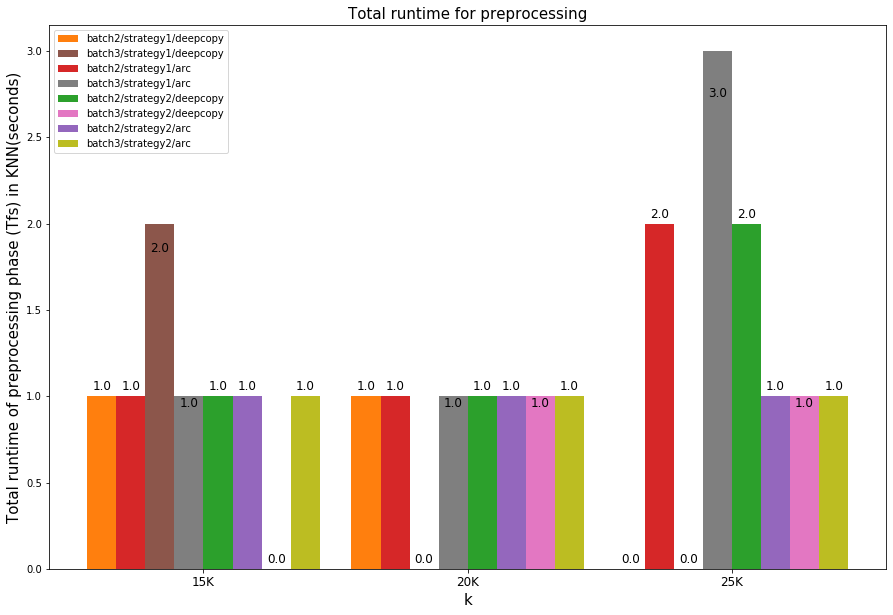

In [35]:
batch2_strategy1_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 2)]
batch2_strategy2_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3_strategy1_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
batch3_strategy2_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
batch2_strategy1_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 2)]
batch2_strategy2_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3_strategy1_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
batch3_strategy2_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.11
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - 7 * w / 2, np.round(np.append(batch2_strategy1_deepcopy["combine_total"].values, 0.0) / 1000, 0), width = w, color ='C1', align = 'center')
b2 = ax.bar(idx - 5 * w / 2 , np.round(batch3_strategy1_deepcopy["combine_total"] / 1000, 0), width = w, color ='C3', align = 'center')
b3 = ax.bar(idx - 3* w / 2, np.round(np.append(batch2_strategy1_arc["combine_total"].values, [0.0, 0.0]) / 1000, 0), width = w, color ='C5', align = 'center')
b4 = ax.bar(idx - w / 2, np.round(batch3_strategy1_arc["combine_total"] / 1000, 0), width = w, color ='C7', align = 'center')
b5 = ax.bar(idx + w / 2, np.round(batch2_strategy2_deepcopy["combine_total"] / 1000, 0), width = w, color ='C2', align = 'center')
b6 = ax.bar(idx + 3 * w / 2, np.round(batch3_strategy2_deepcopy["combine_total"] / 1000, 0), width = w, color ='C4', align = 'center')
b7 = ax.bar(idx + 5 * w / 2, np.round(batch2_strategy2_arc["combine_total"] / 1000, 0), width = w, color ='C6', align = 'center')
b8 = ax.bar(idx + 7 * w / 2, np.round(batch3_strategy2_arc["combine_total"] / 1000, 0), width = w, color ='C8', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("k", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime for preprocessing", fontsize = 15)
autolabel_zigzag(b1, ax, 0)
autolabel_zigzag(b2, ax, -1)
autolabel_zigzag(b3, ax, 0)
autolabel_zigzag(b4, ax, -1)
autolabel_zigzag(b5, ax, 0)
autolabel_zigzag(b6, ax, -1)
autolabel_zigzag(b7, ax, 0)
autolabel_zigzag(b8, ax, -0)
ax.legend((b1, b2, b3, b4, b5, b6, b7, b8), 
          ("batch2/strategy1/deepcopy", "batch3/strategy1/deepcopy", 
           "batch2/strategy1/arc", "batch3/strategy1/arc", 
           "batch2/strategy2/deepcopy", "batch3/strategy2/deepcopy",  
           "batch2/strategy2/arc","batch3/strategy2/arc"))
##ax.set_yscale('log')
# fig.savefig("preprocessing.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


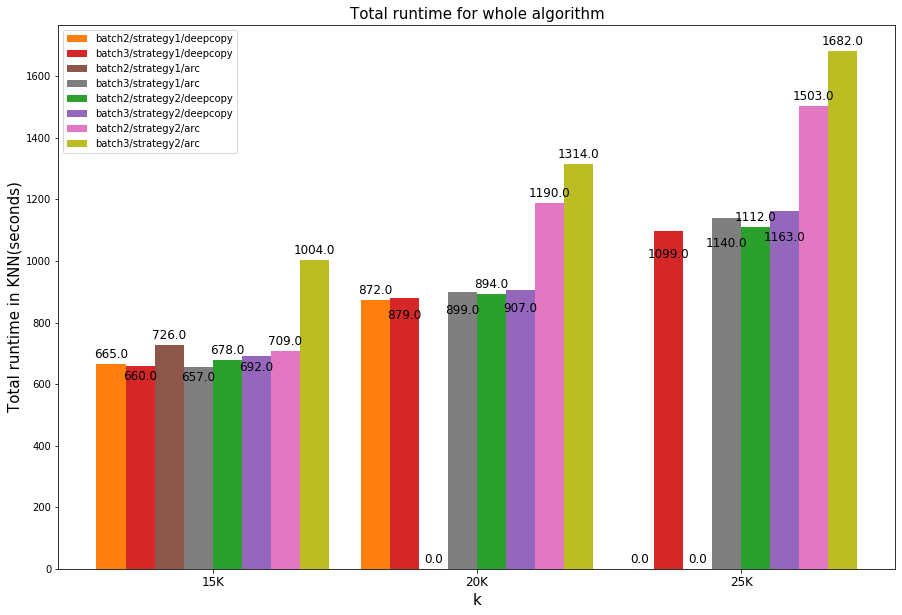

In [60]:
batch2_strategy1_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 2)]
batch2_strategy2_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3_strategy1_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
batch3_strategy2_deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
batch2_strategy1_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 2)]
batch2_strategy2_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3_strategy1_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
batch3_strategy2_arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.11
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - 7 * w / 2, np.round(np.append(batch2_strategy1_deepcopy["total"].values, 0.0) / 1000, 0), width = w, color ='C1', align = 'center')
b2 = ax.bar(idx - 5 * w / 2 , np.round(batch3_strategy1_deepcopy["total"] / 1000, 0), width = w, color ='C3', align = 'center')
b3 = ax.bar(idx - 3* w / 2, np.round(np.append(batch2_strategy1_arc["total"].values, [0.0, 0.0]) / 1000, 0), width = w, color ='C5', align = 'center')
b4 = ax.bar(idx - w / 2, np.round(batch3_strategy1_arc["total"] / 1000, 0), width = w, color ='C7', align = 'center')
b5 = ax.bar(idx + w / 2, np.round(batch2_strategy2_deepcopy["total"] / 1000, 0), width = w, color ='C2', align = 'center')
b6 = ax.bar(idx + 3 * w / 2, np.round(batch3_strategy2_deepcopy["total"] / 1000, 0), width = w, color ='C4', align = 'center')
b7 = ax.bar(idx + 5 * w / 2, np.round(batch2_strategy2_arc["total"] / 1000, 0), width = w, color ='C6', align = 'center')
b8 = ax.bar(idx + 7 * w / 2, np.round(batch3_strategy2_arc["total"] / 1000, 0), width = w, color ='C8', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("k", fontsize = 15)
ax.set_ylabel("Total runtime in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime for whole algorithm", fontsize = 15)
autolabel_zigzag(b1, ax, 0)
autolabel_zigzag(b2, ax, -1)
autolabel_zigzag(b3, ax, 0)
autolabel_zigzag(b4, ax, -1)
autolabel_zigzag(b5, ax, 0)
autolabel_zigzag(b6, ax, -1)
autolabel_zigzag(b7, ax, 0)
autolabel_zigzag(b8, ax, -0)
ax.legend((b1, b2, b3, b4, b5, b6, b7, b8), 
          ("batch2/strategy1/deepcopy", "batch3/strategy1/deepcopy", 
           "batch2/strategy1/arc", "batch3/strategy1/arc", 
           "batch2/strategy2/deepcopy", "batch3/strategy2/deepcopy",  
           "batch2/strategy2/arc","batch3/strategy2/arc"))
##ax.set_yscale('log')
fig.savefig("total.eps")
plt.show()

In [ ]:
# track memory usage size k = 24k

# batch3/strategy1/deepcopy vs batch3/strategy1/arc (use of memory in different variable)
# batch3/strategy2/deepcopy vs batch3/strategy1/deepcopy (use of memory in different strateties)